In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [27]:
data = pd.read_csv('data.csv')
data.drop(columns=['id', 'feature3',] , inplace=True)
# data = data.rank(axis=0)
data = (data - data.min()) / (data.max() - data.min())
data = data * [0,0, 
               2,2, 
               0,2,0,2, 
               0,0.7,0.7,0.7, 
               2,2,2, 
               1.5,0.1,0.1]


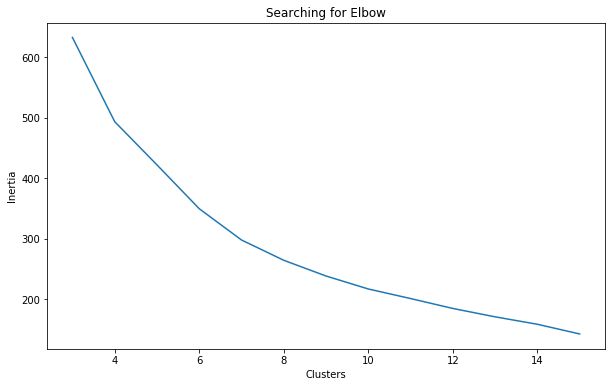

In [28]:
def makeAns(clf, path):
    labels = clf.labels_
    submit = pd.read_csv('submit.csv')
    test = pd.read_csv('test.csv')
    test.drop(columns=['index'], inplace=True)
    for i in range(400):
        submit['ans'].iloc[i] = int(1 if labels[test.iloc[i][0]] == labels[test.iloc[i][1]] else 0)
    submit['ans'] = submit['ans'].values.astype(int)
    submit.to_csv(path, index=None)
    

clusters = []
for i in range(3, 16):
    clf = KMeans(n_clusters=i, random_state=5233).fit(data)
    clusters.append(clf.inertia_)
    

    
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=list(range(3, 16)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

In [29]:
clf = KMeans(n_clusters=4, random_state=5233).fit(data)
makeAns(clf, 'ANS4.csv')
pr = pd.read_csv('ANS4.csv')
print('0:\t',len(pr[pr['ans'] == 0]))
print('1:\t',len(pr[pr['ans'] == 1]))


D:\Program Files (x86)\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0:	 185
1:	 215


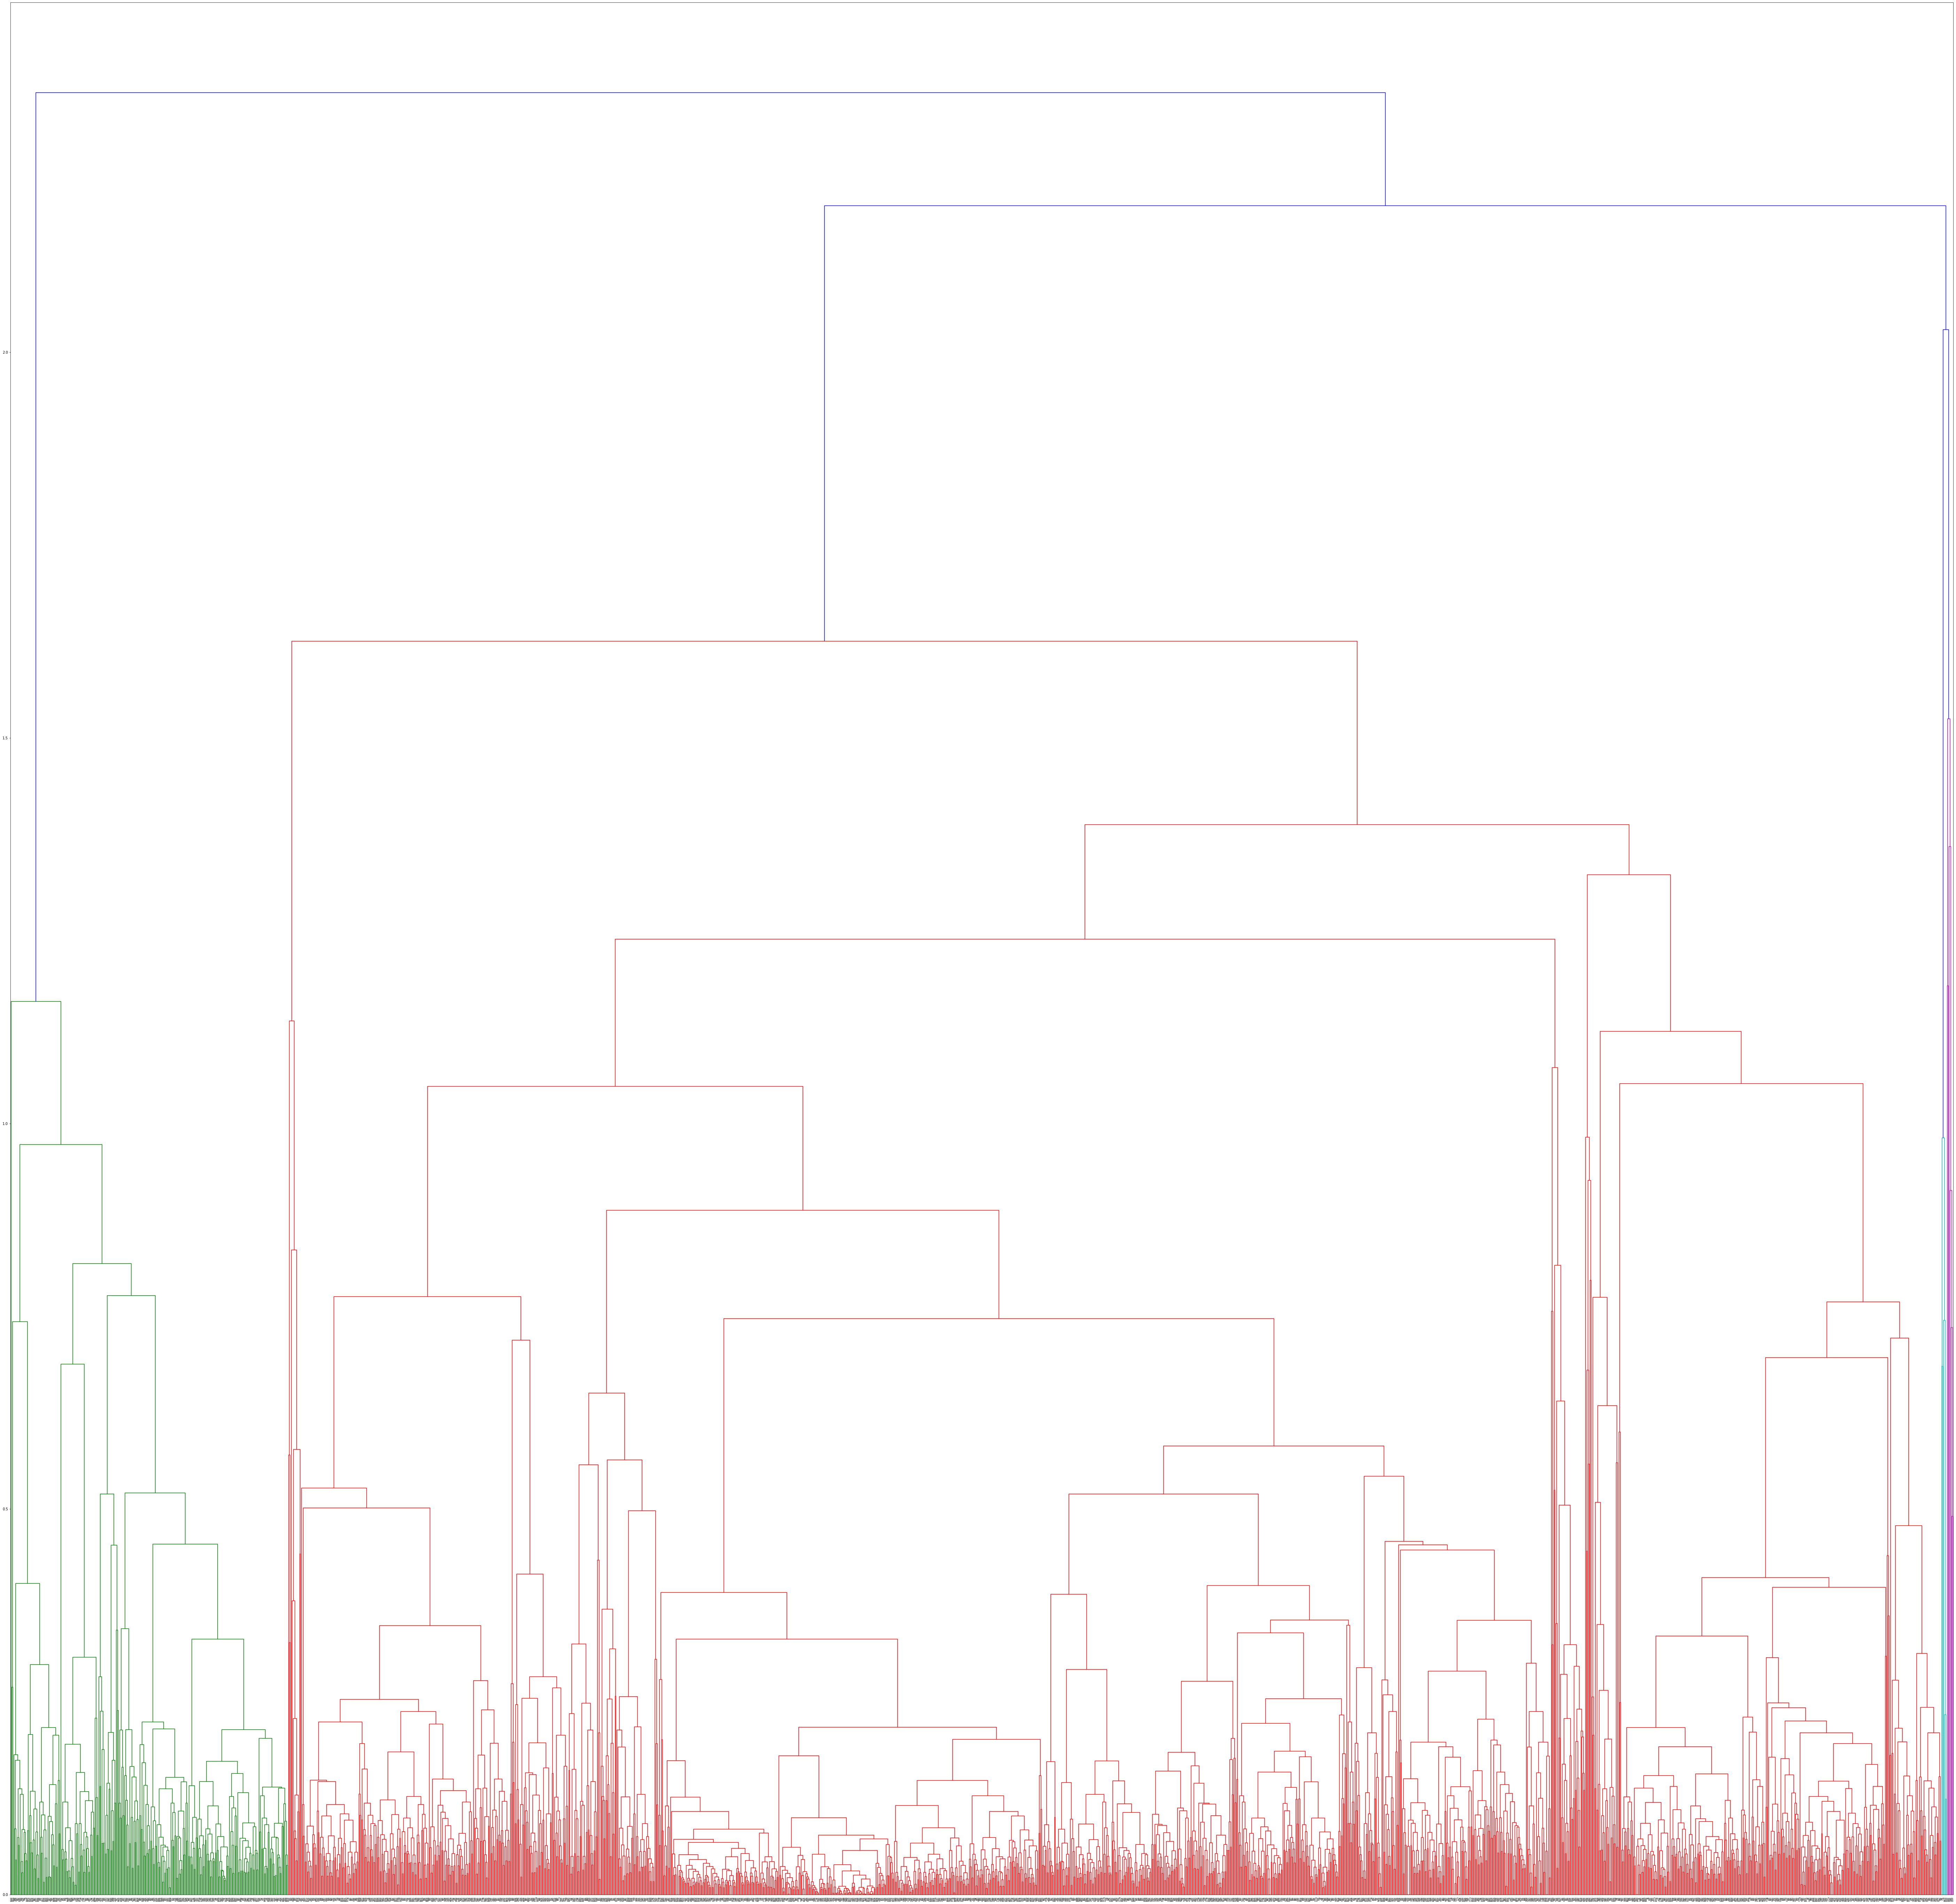

In [9]:
linked = linkage(data.values, 'average')

plt.figure(figsize=(100, 100))
dendrogram(linked,
            orientation='top',
            labels=range(len(data.values)),
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()